In [2]:
%load_ext autoreload

In [3]:
%autoreload 2
%matplotlib inline

In [4]:
import pandas as pd 
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import minmax_scale
from sklearn.metrics import auc, roc_auc_score, precision_score, recall_score, accuracy_score
from sklearn.model_selection import train_test_split

from SepMe.processing.batchprocessing import *

import warnings
warnings.filterwarnings('ignore')

SepMe - INFO - MLFLOW_TRACKING_URI - http://localhost:5000


In [5]:
df = pd.read_csv('lazy_all.csv')
print(df.columns)

df['human_bin'] = 'no'
df.loc[(df['human_rating'].between(50,100)), 'human_bin'] = 'yes'

df['expert_bin'] = 'maybe'
df.loc[(df['M'].isin([4,5])) & (df['A'].isin([4,5])), 'expert_bin'] = 'yes'
df.loc[(df['M'].isin([1,2])) & (df['A'].isin([1,2])), 'expert_bin'] = 'no'



df['M'] = minmax_scale(df['M'])
df['A'] = minmax_scale(df['A'])
df['human_rating'] = minmax_scale(df['human_rating'])


df = df.loc[df['1v1']==False]
df

Index(['filename', 'type', '1v1', 'phase', 'human_rating', 'idx', 'pass',
       'as_0.02_ce', 'as_0.02_cp', 'as_0.02_ltcc', 'as_0.05_ce', 'as_0.05_cp',
       'as_0.05_ltcc', 'as_0.1_ce', 'as_0.1_cp', 'as_0.1_ltcc', 'as_0.5_ce',
       'as_0.5_cp', 'as_0.5_ltcc', 'bt_0.02_cp', 'bt_0.02_ltcc', 'bt_0.05_ce',
       'bt_0.05_cp', 'bt_0.05_ltcc', 'bt_0.1_ce', 'bt_0.1_cp', 'bt_0.1_ltcc',
       'bt_0.5_ce', 'bt_0.5_cp', 'bt_0.5_ltcc', 'cbsg_0.1_ce', 'cbsg_0.1_cp',
       'cbsg_0.1_ltcc', 'cbsg_0.2_ce', 'cbsg_0.2_cp', 'cbsg_0.2_ltcc',
       'cbsg_0.5_ce', 'cbsg_0.5_cp', 'cbsg_0.5_ltcc', 'cbsg_2.0_ce',
       'cbsg_2.0_cp', 'cbsg_2.0_ltcc', 'del_n/a_ce', 'del_n/a_cp',
       'del_n/a_ltcc', 'del_n/a_mv_false', 'del_n/a_mv_true', 'knn_1.0_ce',
       'knn_1.0_cp', 'knn_1.0_ltcc', 'knn_2.0_ce', 'knn_2.0_cp',
       'knn_2.0_ltcc', 'knn_4.0_ce', 'knn_4.0_cp', 'knn_4.0_ltcc',
       'knn_6.0_ce', 'knn_6.0_cp', 'knn_6.0_ltcc', 'knn_8.0_ce', 'knn_8.0_cp',
       'knn_8.0_ltcc', 'index', 'M', 'A',

,filename,type,1v1,phase,human_rating,idx,pass,as_0.02_ce,as_0.02_cp,as_0.02_ltcc,...,knn_6.0_ltcc,knn_8.0_ce,knn_8.0_cp,knn_8.0_ltcc,index,M,A,class,human_bin,expert_bin
0,JavierGeneratedData_3dinterleaved_3classes_Gli...,semantic,False,task,0.17,JavierGeneratedData_3dinterleaved_3classes_Gli...,0.0,0.076577,0.957971,0.993711,...,0.993711,0.045652,0.966195,0.993711,JavierGeneratedData_3dinterleaved_3classes_Gli...,1.0,1.0,1,no,yes
1,JavierGeneratedData_3dinterleaved_3classes_Gli...,semantic,False,task,0.21,JavierGeneratedData_3dinterleaved_3classes_Gli...,0.0,0.076577,0.957971,0.993711,...,0.993711,0.045652,0.966195,0.993711,JavierGeneratedData_3dinterleaved_3classes_Gli...,1.0,1.0,1,no,yes
2,JavierGeneratedData_3dinterleaved_3classes_Gli...,semantic,False,task,0.78,JavierGeneratedData_3dinterleaved_3classes_Gli...,1.0,0.076577,0.957971,0.993711,...,0.993711,0.045652,0.966195,0.993711,JavierGeneratedData_3dinterleaved_3classes_Gli...,1.0,1.0,1,yes,yes
3,JavierGeneratedData_3dinterleaved_3classes_Gli...,semantic,False,task,0.86,JavierGeneratedData_3dinterleaved_3classes_Gli...,1.0,0.076577,0.957971,0.993711,...,0.993711,0.045652,0.966195,0.993711,JavierGeneratedData_3dinterleaved_3classes_Gli...,1.0,1.0,1,yes,yes
4,JavierGeneratedData_3dinterleaved_3classes_Gli...,semantic,False,task,0.85,JavierGeneratedData_3dinterleaved_3classes_Gli...,1.0,0.076577,0.957971,0.993711,...,0.993711,0.045652,0.966195,0.993711,JavierGeneratedData_3dinterleaved_3classes_Gli...,1.0,1.0,1,yes,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28180,ms_interleaved_60_120_3d_0_centeredClusters_Ro...,abstract,False,training,1.00,ms_interleaved_60_120_3d_0_centeredClusters_Ro...,1.0,0.061238,0.961472,1.000000,...,1.000000,0.019895,0.990260,1.000000,ms_interleaved_60_120_3d_0_centeredClusters_Ro...,1.0,1.0,2,yes,yes
28181,ms_interleaved_60_120_3d_0_centeredClusters_Ro...,abstract,False,training,0.97,ms_interleaved_60_120_3d_0_centeredClusters_Ro...,1.0,0.061238,0.961472,1.000000,...,1.000000,0.019895,0.990260,1.000000,ms_interleaved_60_120_3d_0_centeredClusters_Ro...,1.0,1.0,2,yes,yes
28182,ms_interleaved_60_120_3d_0_centeredClusters_Ro...,abstract,False,training,0.83,ms_interleaved_60_120_3d_0_centeredClusters_Ro...,1.0,0.061238,0.961472,1.000000,...,1.000000,0.019895,0.990260,1.000000,ms_interleaved_60_120_3d_0_centeredClusters_Ro...,1.0,1.0,2,yes,yes
28183,ms_interleaved_60_120_3d_0_centeredClusters_Ro...,abstract,False,training,0.60,ms_interleaved_60_120_3d_0_centeredClusters_Ro...,1.0,0.061238,0.961472,1.000000,...,1.000000,0.019895,0.990260,1.000000,ms_interleaved_60_120_3d_0_centeredClusters_Ro...,1.0,1.0,2,yes,yes


In [5]:
#reproducing old sepme
import scikitplot as skplt
import matplotlib.pyplot as plt
import random
from scipy.stats import sem, t
from scipy import mean
confidence = 0.95


def bootstrap_aoc(df, bs=100, sample=1000, target_col='human_bin'):
    
    aucs = {}
    for col in df.columns[7:-2]:

        if df[col].dtype =='float64':
            #print(col)
            df.loc[:, 'a'] = 1 - df[col]
            a = np.array(df.loc[:,target_col].copy())
            b = np.array(df.loc[:, 'a'].copy())

            stuff =[]
            for i in range(bs):
                idx = random.sample(list(np.arange(len(a))),sample)
                stuff.append(roc_auc_score(a[idx],b[idx]))

            n = len(stuff)
            m = mean(stuff)
            std_err = sem(stuff)
            h = std_err * t.ppf((1 + confidence) / 2, n - 1)

            aucs[col] = {}
            aucs[col]['mean'] = m
            aucs[col]['start'] = m-h
            aucs[col]['end'] = m+h
            
            if aucs[col]['mean']>.82:
                print(b)
                b = np.array(df.loc[:, [col,'a']].copy())
                skplt.metrics.plot_roc(a,b)
                plt.show()



    aucs = pd.DataFrame.from_dict(aucs, orient='index').reset_index()
    aucs.columns = ['type','value','ci-','ci+'] 
    aucs = aucs.sort_values('value', ascending=False)
    aucs['spread'] = aucs['ci+'] -aucs['ci-']
    return aucs


(21032, 68)
[0.92342271 0.92342271 0.92342271 ... 0.93876198 0.93876198 0.93876198]


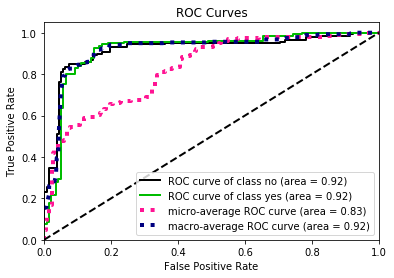

[0.92342271 0.92342271 0.92342271 ... 0.93876198 0.93876198 0.93876198]


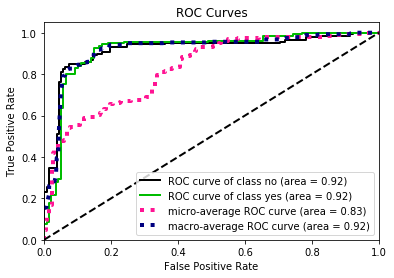

[0.92342271 0.92342271 0.92342271 ... 0.93876198 0.93876198 0.93876198]


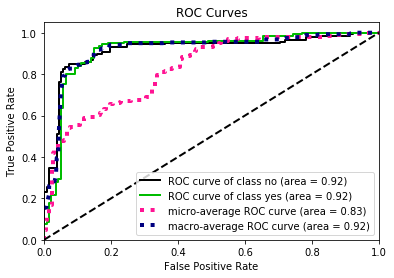

[0.92342271 0.92342271 0.92342271 ... 0.93876198 0.93876198 0.93876198]


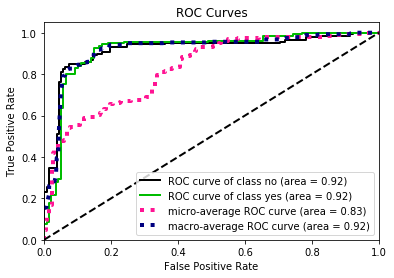

[0.98728353 0.98728353 0.98728353 ... 1.         1.         1.        ]


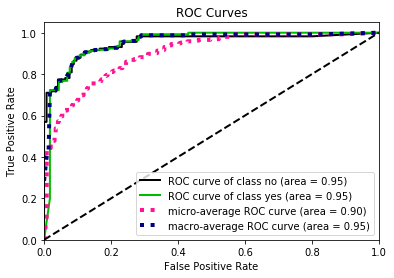

[0.96498691 0.96498691 0.96498691 ... 0.99822065 0.99822065 0.99822065]


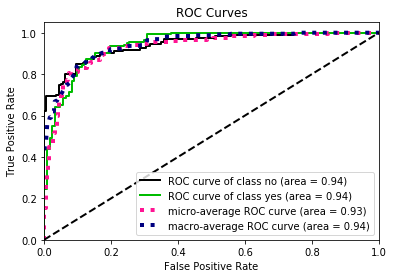

[0.95576484 0.95576484 0.95576484 ... 0.97211987 0.97211987 0.97211987]


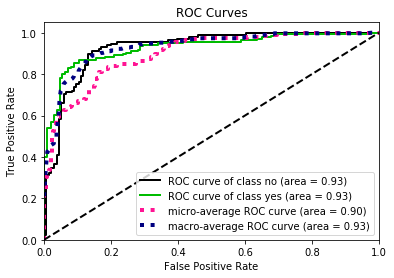

[0.95780227 0.95780227 0.95780227 ... 0.97108752 0.97108752 0.97108752]


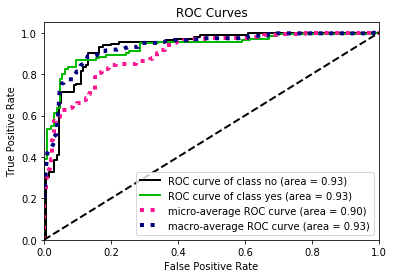

[0.95909166 0.95909166 0.95909166 ... 0.97292731 0.97292731 0.97292731]


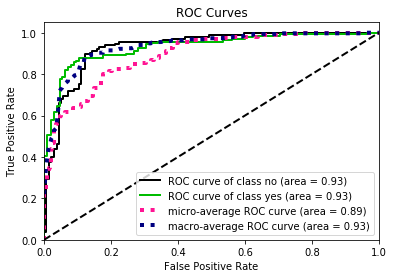

[0.9637081  0.9637081  0.9637081  ... 0.97331212 0.97331212 0.97331212]


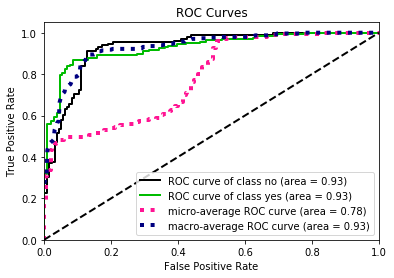

[0.91642766 0.91642766 0.91642766 ... 0.9296304  0.9296304  0.9296304 ]


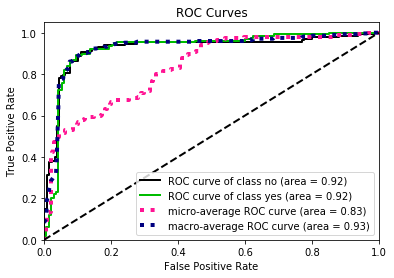

[0.98809567 0.98809567 0.98809567 ... 1.         1.         1.        ]


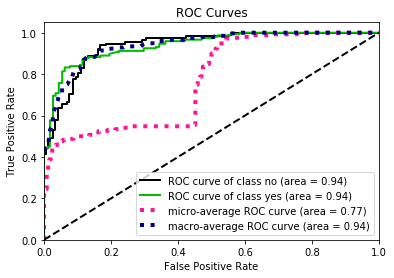

[0.9854244 0.9854244 0.9854244 ... 1.        1.        1.       ]


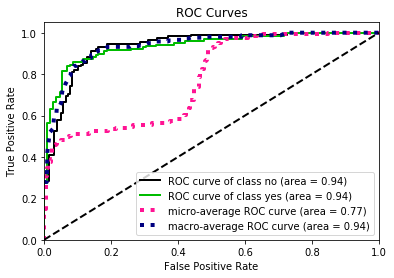

[0.97698271 0.97698271 0.97698271 ... 0.9822538  0.9822538  0.9822538 ]


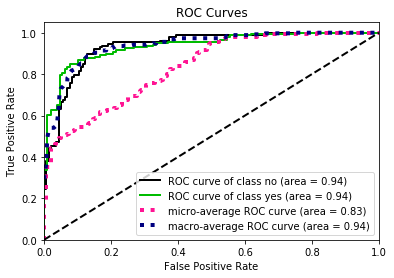

[0.96360808 0.96360808 0.96360808 ... 0.98545569 0.98545569 0.98545569]


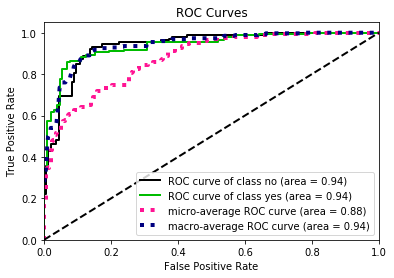

[0.95434754 0.95434754 0.95434754 ... 0.98010465 0.98010465 0.98010465]


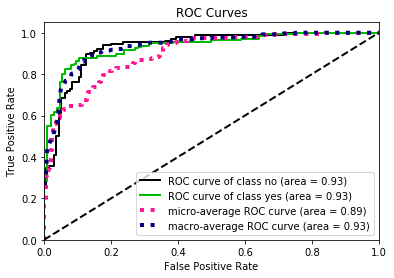

(14172, 68)


,type,value,ci-,ci+,spread
35,del_n/a_ce,0.751944,0.747506,0.756381,0.008875
6,as_0.1_ce,0.750857,0.746227,0.755486,0.009259
14,bt_0.05_ce,0.748347,0.744035,0.752658,0.008623
9,as_0.5_ce,0.748278,0.744231,0.752326,0.008095
17,bt_0.1_ce,0.747430,0.743422,0.751437,0.008016
0,as_0.02_ce,0.747060,0.742992,0.751127,0.008135
3,as_0.05_ce,0.746422,0.742010,0.750833,0.008823
46,knn_4.0_ce,0.732585,0.727924,0.737245,0.009321
49,knn_6.0_ce,0.729706,0.725349,0.734062,0.008714
43,knn_2.0_ce,0.729345,0.724466,0.734223,0.009757


In [6]:
df_exp = df.loc[(df['expert_bin'].isin(['yes','no']))]
print(df_exp.shape)
aucs_human = bootstrap_aoc(df_exp, target_col='expert_bin')
aucs_human.head(20)



df_bin = df.loc[(df['human_rating'].between(0,.30)) | (df['human_rating'].between(.90,1.00))]
print(df_bin.shape)
aucs_human = bootstrap_aoc(df_bin, target_col='human_bin')
aucs_human.head(20)

In [7]:

print(df.shape)
aucs_human = bootstrap_aoc(df, target_col='M')
aucs_human.head(20)

(28205, 68)


ValueError: continuous format is not supported

In [7]:
df['consensus'] = 'no'
df.loc[(df['human_bin']=='yes') & (df['expert_bin']=='yes'), 'consensus'] = 'yes'
df.loc[(df['human_bin']=='no') & (df['expert_bin']=='no'), 'consensus'] = 'yes'
df['consensus'].value_counts()

no     14620
yes    13585
Name: consensus, dtype: int64

In [8]:
df['consensus'] = 'no'
df.loc[(df['human_bin']=='yes') & (df['expert_bin']=='yes'), 'consensus'] = 'yes'
#df.loc[(df['human_bin']=='no') & (df['expert_bin']=='no'), 'consensus'] = 'yes'
df['consensus'].value_counts()


no     21271
yes     6934
Name: consensus, dtype: int64

In [9]:
df.loc[df['class']==1]

,filename,type,1v1,phase,human_rating,idx,pass,as_0.02_ce,as_0.02_cp,as_0.02_ltcc,...,knn_8.0_ce,knn_8.0_cp,knn_8.0_ltcc,index,M,A,class,human_bin,expert_bin,consensus
0,JavierGeneratedData_3dinterleaved_3classes_Gli...,semantic,False,task,0.17,JavierGeneratedData_3dinterleaved_3classes_Gli...,0.0,0.076577,0.957971,0.993711,...,0.045652,0.966195,0.993711,JavierGeneratedData_3dinterleaved_3classes_Gli...,1.0,1.0,1,no,yes,no
1,JavierGeneratedData_3dinterleaved_3classes_Gli...,semantic,False,task,0.21,JavierGeneratedData_3dinterleaved_3classes_Gli...,0.0,0.076577,0.957971,0.993711,...,0.045652,0.966195,0.993711,JavierGeneratedData_3dinterleaved_3classes_Gli...,1.0,1.0,1,no,yes,no
2,JavierGeneratedData_3dinterleaved_3classes_Gli...,semantic,False,task,0.78,JavierGeneratedData_3dinterleaved_3classes_Gli...,1.0,0.076577,0.957971,0.993711,...,0.045652,0.966195,0.993711,JavierGeneratedData_3dinterleaved_3classes_Gli...,1.0,1.0,1,yes,yes,yes
3,JavierGeneratedData_3dinterleaved_3classes_Gli...,semantic,False,task,0.86,JavierGeneratedData_3dinterleaved_3classes_Gli...,1.0,0.076577,0.957971,0.993711,...,0.045652,0.966195,0.993711,JavierGeneratedData_3dinterleaved_3classes_Gli...,1.0,1.0,1,yes,yes,yes
4,JavierGeneratedData_3dinterleaved_3classes_Gli...,semantic,False,task,0.85,JavierGeneratedData_3dinterleaved_3classes_Gli...,1.0,0.076577,0.957971,0.993711,...,0.045652,0.966195,0.993711,JavierGeneratedData_3dinterleaved_3classes_Gli...,1.0,1.0,1,yes,yes,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28120,ms_interleaved_60_120_3d_0_centeredClusters_Ro...,abstract,True,training,0.85,ms_interleaved_60_120_3d_0_centeredClusters_Ro...,1.0,0.083975,0.948282,1.000000,...,0.018563,0.987805,1.000000,ms_interleaved_60_120_3d_0_centeredClusters_Ro...,1.0,1.0,1,yes,yes,yes
28121,ms_interleaved_60_120_3d_0_centeredClusters_Ro...,abstract,True,training,0.55,ms_interleaved_60_120_3d_0_centeredClusters_Ro...,1.0,0.083975,0.948282,1.000000,...,0.018563,0.987805,1.000000,ms_interleaved_60_120_3d_0_centeredClusters_Ro...,1.0,1.0,1,yes,yes,yes
28122,ms_interleaved_60_120_3d_0_centeredClusters_Ro...,abstract,True,training,0.32,ms_interleaved_60_120_3d_0_centeredClusters_Ro...,0.0,0.083975,0.948282,1.000000,...,0.018563,0.987805,1.000000,ms_interleaved_60_120_3d_0_centeredClusters_Ro...,1.0,1.0,1,no,yes,no
28123,ms_interleaved_60_120_3d_0_centeredClusters_Ro...,abstract,True,training,0.64,ms_interleaved_60_120_3d_0_centeredClusters_Ro...,1.0,0.083975,0.948282,1.000000,...,0.018563,0.987805,1.000000,ms_interleaved_60_120_3d_0_centeredClusters_Ro...,1.0,1.0,1,yes,yes,yes


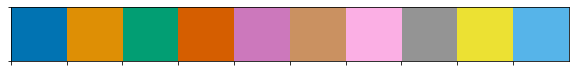

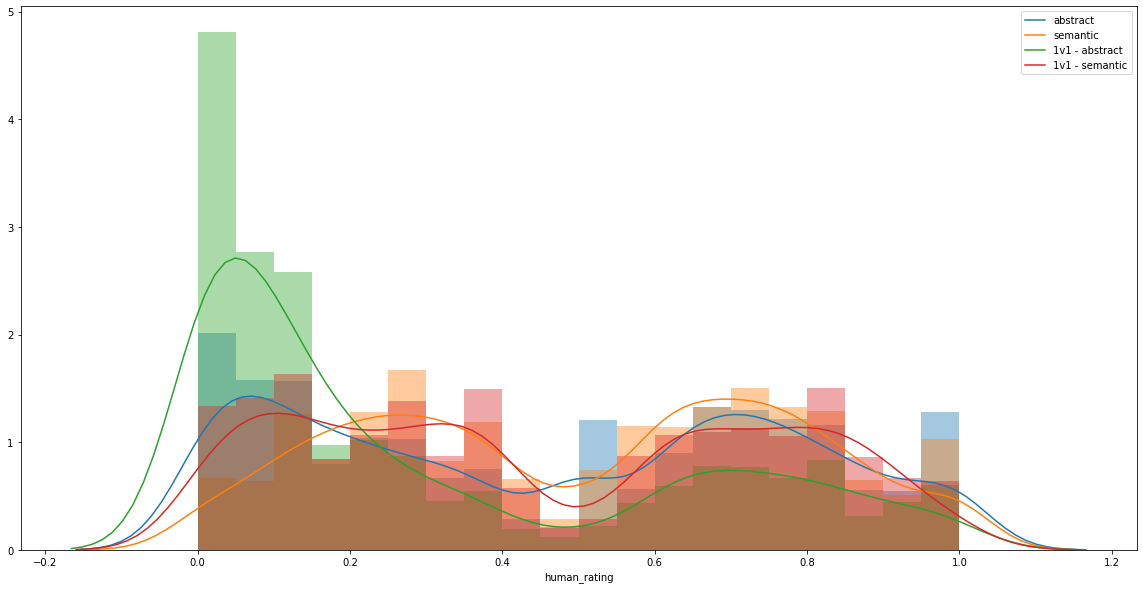

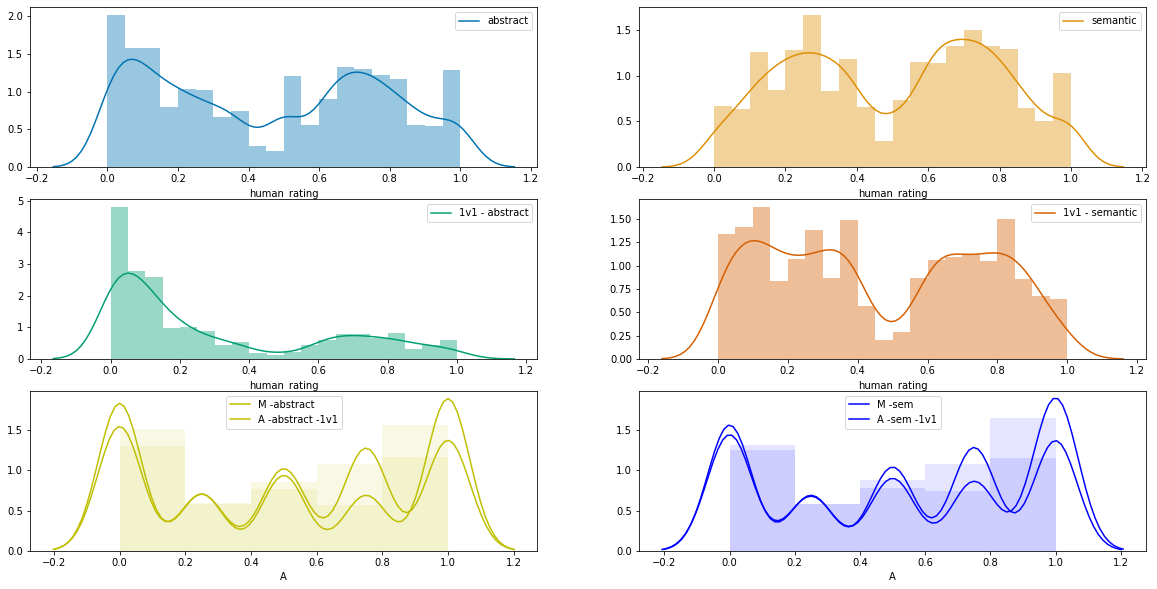

In [10]:
current_palette = sns.color_palette('colorblind')
sns.palplot(current_palette)



def get_dfs(df):
    df1 = select_df(df, kind="abstract", phase="task", versus=False)
    df2 = select_df(df, kind="semantic", phase="task", versus=False)
    df3 = select_df(df, kind="abstract", phase="task", versus=True)
    df4 = select_df(df, kind="semantic", phase="task", versus=True)

    return df1,df2,df3,df4


df1,df2,df3,df4 = get_dfs(df)

fig, ax = plt.subplots(figsize=(20,10))
sns.distplot(df1.human_rating, bins=20, kde_kws={"label": "abstract"})
sns.distplot(df2.human_rating, bins=20, kde_kws={"label": "semantic"})

sns.distplot(df3.human_rating, bins=20, kde_kws={"label": "1v1 - abstract"})
sns.distplot(df4.human_rating, bins=20, kde_kws={"label": "1v1 - semantic"})

# sns.distplot(df1.M, bins=5, color='y', hist_kws=dict(alpha=.1), kde_kws={"label": "M -abstract"})
# sns.distplot(df2.M, bins=5, color='b', hist_kws=dict(alpha=.1), kde_kws={"label": "M -sem"})
# sns.distplot(df3.A, bins=5, color='y', hist_kws=dict(alpha=.1), kde_kws={"label": "A -abstract -1v1"})
# sns.distplot(df4.A, bins=5, color='b', hist_kws=dict(alpha=.1), kde_kws={"label": "A -sem -1v1"})




fig, ax = plt.subplots(3,2, figsize=(20,10))
sns.distplot(df1.human_rating, bins=20, kde_kws={"label": "abstract"}, ax=ax[0,0], color = current_palette[0])
sns.distplot(df2.human_rating, bins=20, kde_kws={"label": "semantic"}, ax=ax[0,1], color = current_palette[1])

sns.distplot(df3.human_rating, bins=20, kde_kws={"label": "1v1 - abstract"}, ax=ax[1,0], color = current_palette[2])
sns.distplot(df4.human_rating, bins=20, kde_kws={"label": "1v1 - semantic"}, ax=ax[1,1], color = current_palette[3])




sns.distplot(df1.M, bins=5, color='y', hist_kws=dict(alpha=.1), kde_kws={"label": "M -abstract"}, ax=ax[2,0])
sns.distplot(df2.M, bins=5, color='b', hist_kws=dict(alpha=.1), kde_kws={"label": "M -sem"}, ax=ax[2,1])
sns.distplot(df3.A, bins=5, color='y', hist_kws=dict(alpha=.1), kde_kws={"label": "A -abstract -1v1"}, ax=ax[2,0])
sns.distplot(df4.A, bins=5, color='b', hist_kws=dict(alpha=.1), kde_kws={"label": "A -sem -1v1"}, ax=ax[2,1])




In [11]:
import xgboost as xgb
from sklearn.metrics import explained_variance_score

df['type_bool'] = False
df.loc[df['type']=='semantic','type_bool'] = True

df['phase_bool'] = False
df.loc[df['phase']=='semantic','phase_bool'] = True



x_cols = ['type_bool', '1v1', 'phase_bool','pass', 'as_0.02_ce', 'as_0.02_cp', 'as_0.02_ltcc', 'as_0.05_ce', 'as_0.05_cp',
       'as_0.05_ltcc', 'as_0.1_ce', 'as_0.1_cp', 'as_0.1_ltcc', 'as_0.5_ce',
       'as_0.5_cp', 'as_0.5_ltcc', 'bt_0.02_cp', 'bt_0.02_ltcc', 'bt_0.05_ce',
       'bt_0.05_cp', 'bt_0.05_ltcc', 'bt_0.1_ce', 'bt_0.1_cp', 'bt_0.1_ltcc',
       'bt_0.5_ce', 'bt_0.5_cp', 'bt_0.5_ltcc', 'cbsg_0.1_ce', 'cbsg_0.1_cp',
       'cbsg_0.1_ltcc', 'cbsg_0.2_ce', 'cbsg_0.2_cp', 'cbsg_0.2_ltcc',
       'cbsg_0.5_ce', 'cbsg_0.5_cp', 'cbsg_0.5_ltcc', 'cbsg_2.0_ce',
       'cbsg_2.0_cp', 'cbsg_2.0_ltcc', 'del_n/a_ce', 'del_n/a_cp',
       'del_n/a_ltcc', 'del_n/a_mv_false', 'del_n/a_mv_true', 'knn_1.0_ce',
       'knn_1.0_cp', 'knn_1.0_ltcc', 'knn_2.0_ce', 'knn_2.0_cp',
       'knn_2.0_ltcc', 'knn_4.0_ce', 'knn_4.0_cp', 'knn_4.0_ltcc',
       'knn_6.0_ce', 'knn_6.0_cp', 'knn_6.0_ltcc', 'knn_8.0_ce', 'knn_8.0_cp',
       'knn_8.0_ltcc']

y = ['human_rating' , 'M']




X_train, X_test, Y_train, Y_test = train_test_split(df[x_cols], df[y[0]], test_size=0.2, stratify=df['filename'])

D_train = xgb.DMatrix(X_train, label=Y_train)
D_test = xgb.DMatrix(X_test, label=Y_test)

param = {
    'eta': 0.3, 
    'max_depth': 30,  
    'objective': 'multi:softprob',  
    'num_class': 3} 

steps = 20  # The number of training iterations

model = xgb.train(param, D_train, steps)



preds = model.predict(D_test)
best_preds = np.asarray([np.argmax(line) for line in preds])

# print("Precision = {}".format(precision_score(Y_test, best_preds, average='macro')))
# print("Recall = {}".format(recall_score(Y_test, best_preds, average='macro')))
# print("Accuracy = {}".format(accuracy_score(Y_test, best_preds)))

In [ ]:
from sklearn.model_selection import GridSearchCV

clf = xgb.XGBRegressor()
parameters = {
     "n_estimators"    : [10, 50,100,250] ,
     "max_depth"        : [ 5,  8, 10, 15],
     "learning_rate" : [0.01, 0.02, 0.05, 0.1],
     "min_child_weight" : [ 1, 3, 5, 7 ],
     "gamma"            : [ 0.0, 0.1, 0.2 , 0.4 ],
     "colsample_bytree" : [ 0.4, 0.5]
     }

grid = GridSearchCV(clf,
                    parameters, n_jobs=-1,
                    scoring="neg_mean_squared_error",
                    cv=3, verbose=5)

grid.fit(X_train, Y_train)

Fitting 3 folds for each of 2048 candidates, totalling 6144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 10.2min


In [32]:
model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7, verbosity=3)

model.fit(X_train, Y_train)



[00:54:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:54:30] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 230 extra nodes, 0 pruned nodes, max_depth=7
[00:54:30] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 230 extra nodes, 0 pruned nodes, max_depth=7
[00:54:30] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 218 extra nodes, 0 pruned nodes, max_depth=7
[00:54:30] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 220 extra nodes, 0 pruned nodes, max_depth=7
[00:54:30] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 232 extra nodes, 0 pruned nodes, max_depth=7
[00:54:30] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 236 extra nodes, 0 pruned nodes, max_depth=7
[00:54:31] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 234 extra nodes, 0 pruned nodes, max_depth=7
[00:54:31] INFO: src/tree/updater_prune.cc:74: tree

[00:54:37] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 210 extra nodes, 0 pruned nodes, max_depth=7
[00:54:37] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 214 extra nodes, 0 pruned nodes, max_depth=7
[00:54:37] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 168 extra nodes, 0 pruned nodes, max_depth=7
[00:54:37] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 164 extra nodes, 0 pruned nodes, max_depth=7
[00:54:37] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 200 extra nodes, 0 pruned nodes, max_depth=7
[00:54:38] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 232 extra nodes, 0 pruned nodes, max_depth=7
[00:54:38] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 216 extra nodes, 0 pruned nodes, max_depth=7
[00:54:38] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 236 extra nodes, 0 pruned nodes, max_depth=7
[00:54:38] INFO: src/tree/updater_prune.cc:74: t

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.08, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.75, verbosity=3)

In [33]:
predictions = model.predict(X_test)
print(explained_variance_score(predictions,Y_test))

0.11664433766424143


In [38]:
import sklearn.metrics as sm

sm.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])